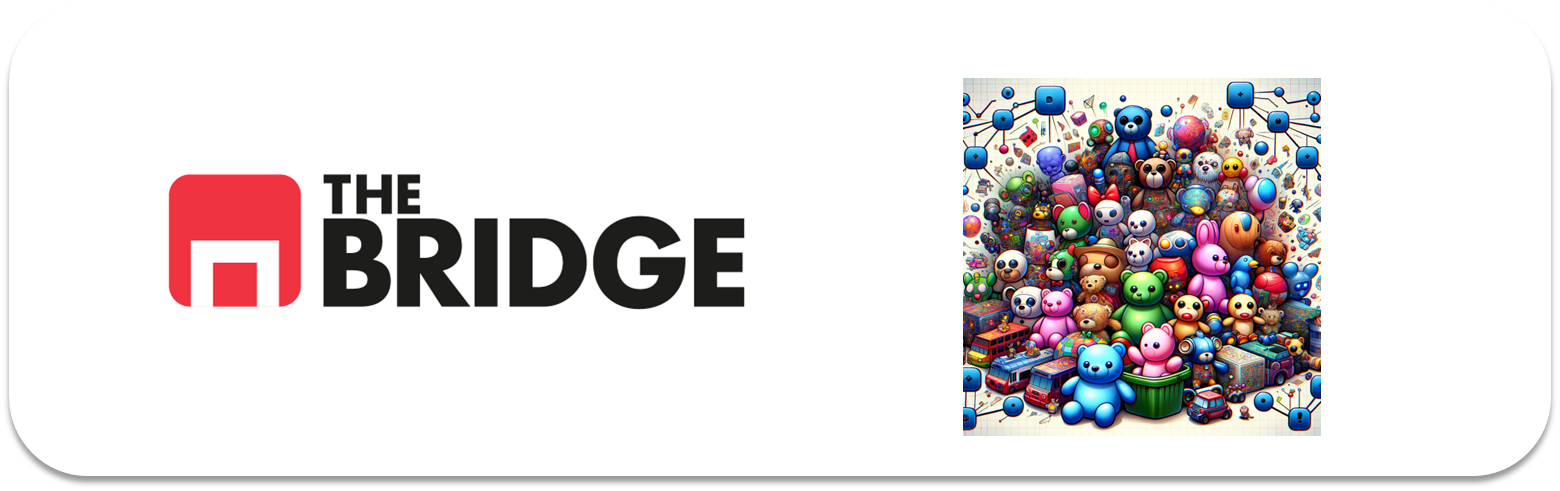

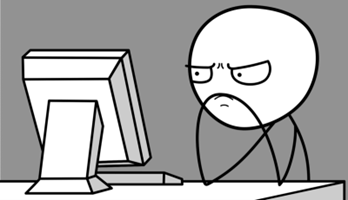

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage
import bootcampviztools as bvt
warnings.filterwarnings("ignore")

### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesida de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a encontrar algún tipo de segmentación que luego ello se encargarían de interpretar. No es requisito obligatorio pero les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)

NOTA ORIENTATIVA: Los químicos no esperan que haya menos de 3 segmentos ni más de 5.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [39]:
df_drinks = pd.read_csv("./empowering_drinks.csv", sep="|")
df_newexp = pd.read_csv("./new_experiments.csv", sep="|")
df_results = pd.read_csv("./power_results.csv", sep="|")

In [40]:
df_drinks

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.518613,0.232053,1.034819,1.013009,0.251717
1,0.246290,-0.827996,0.733629,0.965242,-0.293321
2,0.196879,1.109334,1.215533,1.395148,0.269020
3,1.691550,0.487926,1.466525,2.334574,1.186068
4,0.295700,1.840403,0.663351,-0.037874,-0.319276
...,...,...,...,...,...
148,0.493343,0.414820,-1.284344,0.009893,0.969783
149,0.332758,-0.389355,-1.344582,0.280575,2.224236
150,0.209232,0.012732,-1.354622,0.296498,1.834923
151,1.395086,1.365208,-1.274305,-0.595160,1.791666


In [41]:
df_newexp

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.481555,0.305159,1.366128,2.239039,0.731870
1,0.616869,0.890014,0.583034,0.312420,-0.665332
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583
5,0.962743,-0.243142,-1.354622,-0.420013,1.956043


In [42]:
df_results

,class
0,1
1,1
2,1
3,1
4,1
...,...
154,1
155,2
156,2
157,3


In [43]:
df = df_drinks.copy()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


In [45]:
df.describe()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.019231,0.037273,0.041057,0.080022,-0.044088
std,1.026182,0.995984,1.040928,1.009450,0.934399
min,-2.434235,-3.679162,-1.695971,-1.493188,-1.634288
25%,-0.816038,-0.499016,-1.043392,-0.738463,-0.799428
50%,0.061000,-0.023821,0.211566,-0.165254,-0.154899
75%,0.876275,0.707247,0.894264,0.917474,0.493956
max,2.259772,3.156325,3.062832,2.971473,2.431870


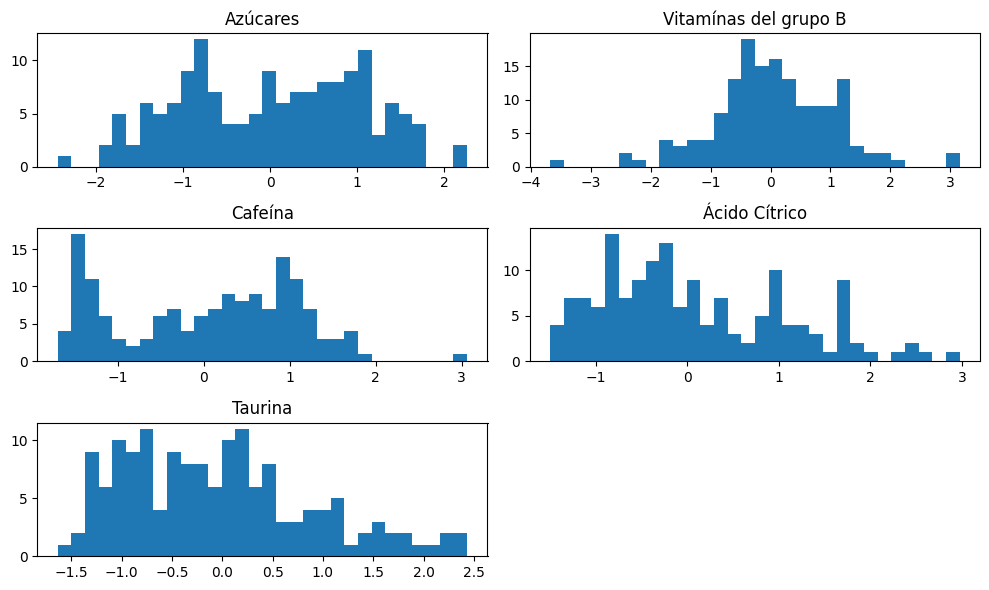

In [46]:
df.hist(bins=30, figsize=(10,6), grid=False)
plt.tight_layout()

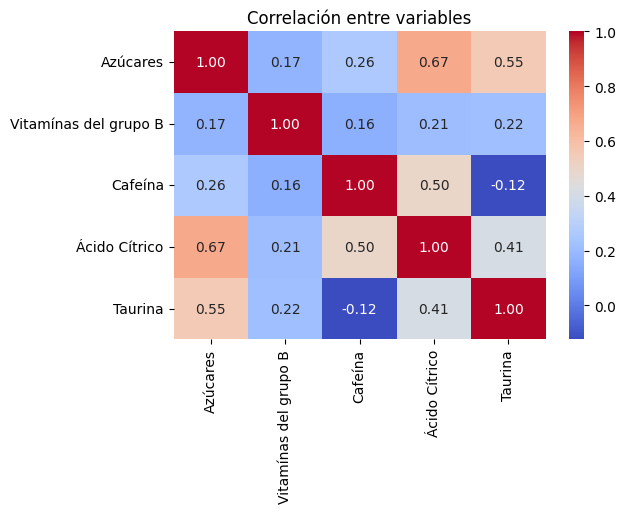

In [47]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación entre variables")
plt.show()

In [48]:
# Hago el escalado de las 5 variables
features = df.columns 
X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
print(np.mean(X_scaled, axis=0)) # media
print(np.std (X_scaled, axis=0)) # desviación tipica 

[-4.64407017e-17  2.90254386e-17  4.64407017e-17  0.00000000e+00
 -1.16101754e-17]
[1. 1. 1. 1. 1.]


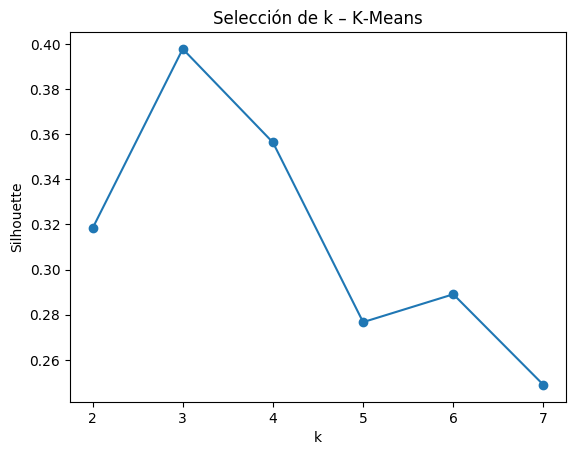

Mejor k: 3  (silhouette = 0.398)


In [50]:
# Elijo el k para K‑Means
k_range = range(2, 8)
sil_scores = {}

for k in k_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_scores[k] = silhouette_score(X_scaled, labels)

plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker="o")
plt.xlabel("k"); plt.ylabel("Silhouette")
plt.title("Selección de k – K‑Means")
plt.show()

k_opt = max(sil_scores, key=sil_scores.get)
print(f"Mejor k: {k_opt}  (silhouette = {sil_scores[k_opt]:.3f})")


In [51]:
# Entreno K‑Means y añado etiquetas
kmeans = KMeans(n_clusters=k_opt, n_init=10, random_state=42)
df["cluster_km"] = kmeans.fit_predict(X_scaled)

print("Tamaño de cada segmento:")
display(df["cluster_km"].value_counts())

Tamaño de cada segmento:


cluster_km
2    58
0    58
1    37
Name: count, dtype: int64

In [52]:
# Busco los hiperparámetros
eps_grid = np.arange(0.5, 1.2, 0.1)
min_samples_grid = range(4, 9)

best_sil, best_cfg = -1, None
for eps in eps_grid:
    for ms in min_samples_grid:
        db = DBSCAN(eps=eps, min_samples=ms)
        lbl = db.fit_predict(X_scaled)
        good = lbl != -1
        if len(set(lbl[good])) < 2:  
            continue
        sil = silhouette_score(X_scaled[good], lbl[good])
        if sil > best_sil:
            best_sil, best_cfg = sil, (eps, ms)

print(f"Mejor config DBSCAN: eps={best_cfg[0]}, min_samples={best_cfg[1]}, silhouette={best_sil:.3f}")

# entreno con los mejores
eps, ms = best_cfg
dbscan = DBSCAN(eps=eps, min_samples=ms)
df["cluster_db"] = dbscan.fit_predict(X_scaled)

print("\nDistribución de etiquetas DBSCAN (‑1 = ruido):")
display(df["cluster_db"].value_counts())


Mejor config DBSCAN: eps=0.7, min_samples=6, silhouette=0.781

Distribución de etiquetas DBSCAN (‑1 = ruido):


cluster_db
-1    133
 1     14
 0      6
Name: count, dtype: int64

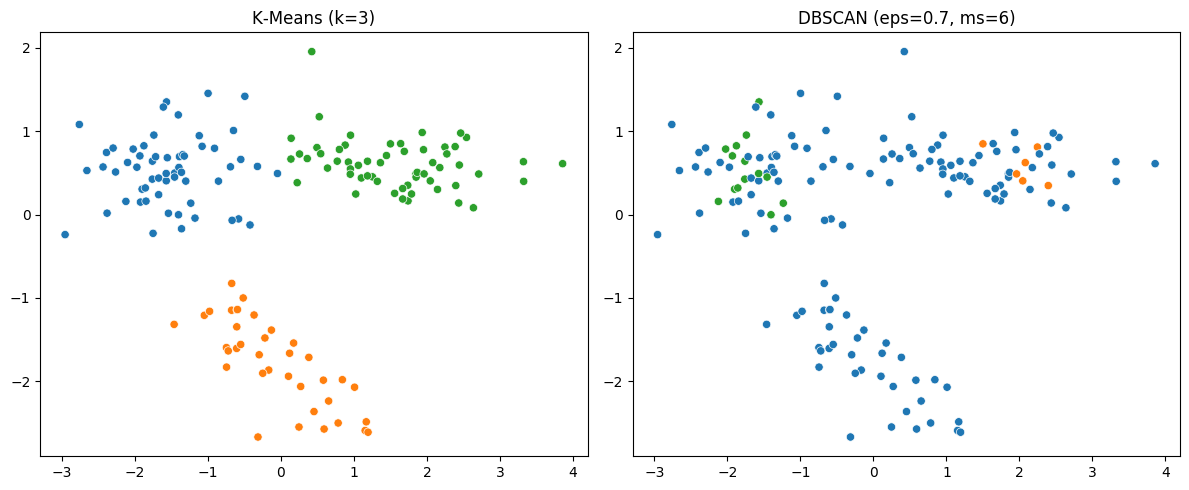

In [53]:
# Compruebo los dos resultados con PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# K-Means
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["cluster_km"],
                palette="tab10", ax=ax[0], legend=False)
ax[0].set_title(f"K‑Means (k={k_opt})")

# DBSCAN
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["cluster_db"],
                palette="tab10", ax=ax[1], legend=False)
ax[1].set_title(f"DBSCAN (eps={eps}, ms={ms})")

plt.tight_layout()
plt.show()


In [54]:
print("Silhouette K‑Means:", silhouette_score(X_scaled, df["cluster_km"]))
print(df["cluster_km"].value_counts()) 

Silhouette K‑Means: 0.3978205860790234
cluster_km
2    58
0    58
1    37
Name: count, dtype: int64


### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [55]:
X_new = df_newexp[df.columns[:5]].values
X_new_scaled = scaler.transform(X_new)

In [56]:
df_newexp["cluster_km"] = kmeans.predict(X_new_scaled)

In [57]:
df_newexp["cluster_km"].value_counts()

cluster_km
2    2
0    2
1    2
Name: count, dtype: int64

In [58]:
df_newexp.head()

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,cluster_km
0,1.481555,0.305159,1.366128,2.239039,0.731870,2
1,0.616869,0.890014,0.583034,0.312420,-0.665332,2
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782,0
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240,0
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583,1


He conseguido segmentar todo en tres grupos mediante K‑Means (k = 3), obteniendo una silhouette de 0,40 y un reparto equilibrado de 58‑58‑37 mezclas. 
Los centroides muestran tres perfiles: 
- un cluster “high‑boost”, alto en azúcares y cafeína
- uno “low‑cal / sour”, con poca azúcar y más ácido cítrico
- "vitamin‑rich” que es alto en complejo B y con cafeína moderada. 

Por lo tanto, recomiendo usar este modelo para etiquetar los nuevos prototipos, hacer pruebas para los clusters que mejor reusltado pueden dar (high‑boost y vitamin‑rich) y dejar el DBSCAN como apoyo para detectar formulaciones en el futuro.

### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.